In [2]:
import pandas as pd

from data_processing import save_probabilities
from visualization import view_plateau

In [19]:
filename= '../data/nlexique.csv'
df = pd.read_csv(filename)
df = df[['lexeme', 'sg', 'gen']].rename(columns={'lexeme': 'orthography', 'sg': 'phonetic transcription', 'gen': 'gender'}).dropna().reset_index(drop=True)
df

,orthography,phonetic transcription,gender
0,à-côté,akOte,m
1,à-coup,aku,m
2,à-peu-près,apØpʁɛ,m
3,à-pic,apik,m
4,à-plat,apla,m
...,...,...,...
30999,zurichois,zyʁikwa,m
31000,zydeco,zidəko,f
31001,zygoma,zigOma,m
31002,zygote,zigɔt,m


In [ ]:
# model_checkpoint = ''
# checkpoint = torch.load(model_checkpoint)

# or3_train_acc = checkpoint['train_accuracy']
# or3_train_loss = checkpoint['train_loss']
# or3_valid_acc = checkpoint['valid_accuracy']
# or3_valid_loss = checkpoint['valid_loss']

# plot_metrics(or3_train_acc, or3_valid_acc, or3_train_loss, or3_valid_loss)

In [20]:
whitespace = df[df['orthography'].str.contains(' ')]
whitespace

,orthography,phonetic transcription,gender
232,acid jazz,asiddʒaz,m
273,action painting,akʃœnpEntiŋ,f
542,agnus dei,agnusdEi,m
645,air bag,ɛʁbag,m
839,alter ego,altɛʁEgo,m
...,...,...,...
30807,wait and see,wEjtɛ̃ndsi,m
30811,wall street,wOlstʁit,b
30826,way of life,wɛjɔflajf,m
30856,world music,wɔʁldmyzik,f


abrutisseur found in the validation set


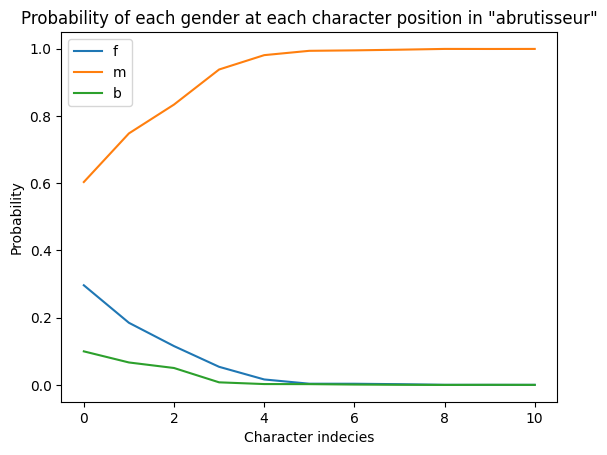

Probability values:
  [{'f': 0.2965147793292999, 'm': 0.6034663319587708, 'b': 0.10001885145902634}, {'f': 0.18497726321220398, 'm': 0.7480272054672241, 'b': 0.06699558347463608}, {'f': 0.11565404385328293, 'm': 0.8337939977645874, 'b': 0.05055200681090355}, {'f': 0.05406069755554199, 'm': 0.9380290508270264, 'b': 0.007910266518592834}, {'f': 0.01649388112127781, 'm': 0.9807157516479492, 'b': 0.0027904317248612642}, {'f': 0.003834128612652421, 'm': 0.9935901165008545, 'b': 0.0025757821276783943}, {'f': 0.003718397580087185, 'm': 0.9949487447738647, 'b': 0.0013327724300324917}, {'f': 0.0024313642643392086, 'm': 0.9969258904457092, 'b': 0.000642643659375608}, {'f': 0.0005493634380400181, 'm': 0.9992237091064453, 'b': 0.000226916468818672}, {'f': 0.0004042760992888361, 'm': 0.9990717172622681, 'b': 0.0005240159807726741}, {'f': 0.00043588472180999815, 'm': 0.999211311340332, 'b': 0.0003527825465425849}]
--------------------------------------------------------------------------------------

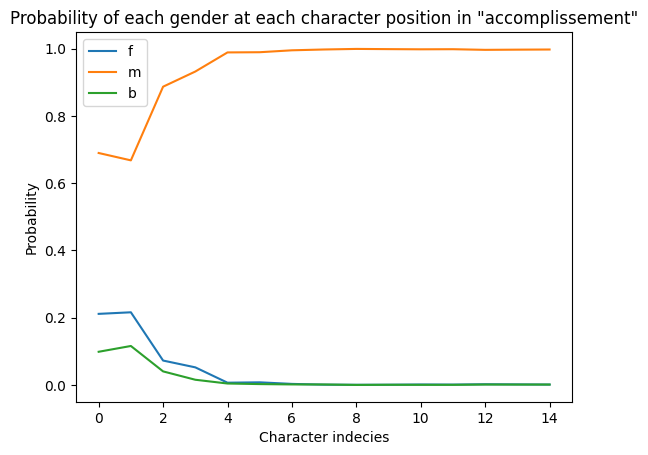

Probability values:
  [{'f': 0.21149952709674835, 'm': 0.6896899342536926, 'b': 0.098810575902462}, {'f': 0.21616925299167633, 'm': 0.6678041815757751, 'b': 0.11602655053138733}, {'f': 0.07269986718893051, 'm': 0.8868069052696228, 'b': 0.040493208914995193}, {'f': 0.0524924173951149, 'm': 0.9318587183952332, 'b': 0.01564883254468441}, {'f': 0.006884514354169369, 'm': 0.9886896014213562, 'b': 0.0044259438291192055}, {'f': 0.007966346107423306, 'm': 0.9892811179161072, 'b': 0.002752570668235421}, {'f': 0.0033033734653145075, 'm': 0.9949876070022583, 'b': 0.0017090629553422332}, {'f': 0.0010428306413814425, 'm': 0.9974119067192078, 'b': 0.0015451826620846987}, {'f': 0.0006453189998865128, 'm': 0.9990890026092529, 'b': 0.000265682814642787}, {'f': 0.0008303632494062185, 'm': 0.9984654188156128, 'b': 0.0007042773650027812}, {'f': 0.0014968515606597066, 'm': 0.9979377388954163, 'b': 0.0005653895786963403}, {'f': 0.001230873866006732, 'm': 0.9982328414916992, 'b': 0.0005361786461435258}, {'f'

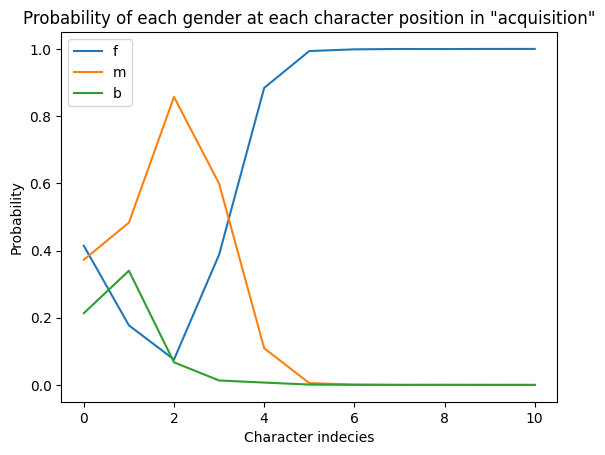

Probability values:
  [{'f': 0.4140254259109497, 'm': 0.3725530207157135, 'b': 0.2134215533733368}, {'f': 0.1772737354040146, 'm': 0.48280924558639526, 'b': 0.33991697430610657}, {'f': 0.07574724406003952, 'm': 0.8570177555084229, 'b': 0.06723509728908539}, {'f': 0.38757824897766113, 'm': 0.5991141200065613, 'b': 0.013307597488164902}, {'f': 0.8837735652923584, 'm': 0.10919377207756042, 'b': 0.007032683584839106}, {'f': 0.9933653473854065, 'm': 0.0055009592324495316, 'b': 0.0011335843009874225}, {'f': 0.9984849095344543, 'm': 0.001171473995782435, 'b': 0.00034360139397904277}, {'f': 0.9995181560516357, 'm': 0.0003772553463932127, 'b': 0.00010461790225235745}, {'f': 0.9993688464164734, 'm': 0.00045361652155406773, 'b': 0.00017751938139554113}, {'f': 0.9996881484985352, 'm': 0.00024061357544269413, 'b': 7.128358993213624e-05}, {'f': 0.9997373223304749, 'm': 0.0001719363935990259, 'b': 9.073139517568052e-05}]
--------------------------------------------------------------------------------

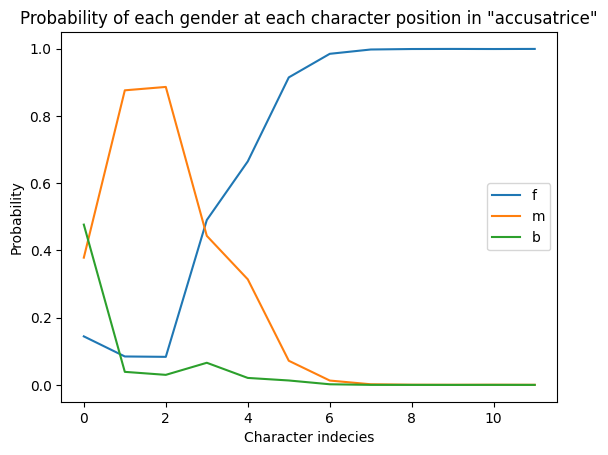

Probability values:
  [{'f': 0.14453551173210144, 'm': 0.37862610816955566, 'b': 0.4768384099006653}, {'f': 0.08477440476417542, 'm': 0.876193642616272, 'b': 0.0390319786965847}, {'f': 0.08365093916654587, 'm': 0.8862507343292236, 'b': 0.030098358169198036}, {'f': 0.49053072929382324, 'm': 0.4434339106082916, 'b': 0.06603535264730453}, {'f': 0.6649166941642761, 'm': 0.31412121653556824, 'b': 0.020962096750736237}, {'f': 0.9145905375480652, 'm': 0.07202596962451935, 'b': 0.013383486308157444}, {'f': 0.9847431182861328, 'm': 0.013168072327971458, 'b': 0.0020887956488877535}, {'f': 0.9975835084915161, 'm': 0.00208121445029974, 'b': 0.00033525252365507185}, {'f': 0.9989960789680481, 'm': 0.0007613762281835079, 'b': 0.00024253306037280709}, {'f': 0.9992603659629822, 'm': 0.0005733064608648419, 'b': 0.00016634186613373458}, {'f': 0.9989990592002869, 'm': 0.0007136106141842902, 'b': 0.00028731205384247005}, {'f': 0.9992949962615967, 'm': 0.0004775758134201169, 'b': 0.00022746350441593677}]


In [21]:
# view_plateau('abstraction', '../saved_models/orthography_3gen.pth')
# view_plateau('abatage', '../saved_models/orthography_3gen.pth')
view_plateau('abrutisseur', '../saved_models/orthography_3gen.pth')
print('-' * 100)
view_plateau('accomplissement', '../saved_models/orthography_3gen.pth')
print('-' * 100)
view_plateau('acquisition', '../saved_models/orthography_3gen.pth')
print('-' * 100)
view_plateau('accusatrice', '../saved_models/orthography_3gen.pth')

In [10]:
save_probabilities('../saved_models/orthography_3gen.pth', df[['orthography', 'gender']], '../results/orthography_3gen.csv')

File successfully written to ../results/orthography_3gen.csv.


In [15]:
or3_results = pd.read_csv('../results/orthography_3gen.csv')
or3_results

,Nouns,Class Probabilities,True Gender,Set
0,a,"[{'f': 0.2295863926410675, 'm': 0.648340880870...",m,Validation
1,abaca,"[{'f': 0.2295863926410675, 'm': 0.648340880870...",m,Validation
2,abaisse,"[{'f': 0.14453551173210144, 'm': 0.37862610816...",f,Validation
3,abaissement,"[{'f': 0.21149952709674835, 'm': 0.68968993425...",m,Validation
4,abat-son,"[{'f': 0.4140254259109497, 'm': 0.372553020715...",m,Validation
...,...,...,...,...
30999,évêque,"[{'f': 0.19080115854740143, 'm': 0.40988835692...",m,Training
31000,éwé,"[{'f': 0.26998454332351685, 'm': 0.65346777439...",m,Training
31001,île,"[{'f': 0.17650333046913147, 'm': 0.38741931319...",f,Training
31002,îlette,"[{'f': 0.15823864936828613, 'm': 0.37264302372...",f,Training


In [16]:
import ast

or3_results['Noun_Length'] = or3_results['Nouns'].apply(len)
or3_results['Probabilities_Length'] = or3_results['Class Probabilities'].apply(lambda x: len(ast.literal_eval(x)))

filtered_df = or3_results[or3_results['Probabilities_Length'] != or3_results['Noun_Length']]

filtered_df

,Nouns,Class Probabilities,True Gender,Set,Noun_Length,Probabilities_Length
0,a,"[{'f': 0.2295863926410675, 'm': 0.648340880870...",m,Validation,1,3
14,abrogation,"[{'f': 0.4140254259109497, 'm': 0.372553020715...",f,Validation,10,11
21,abêtissement,"[{'f': 0.21149952709674835, 'm': 0.68968993425...",m,Validation,12,13
42,accusatrice,"[{'f': 0.14453551173210144, 'm': 0.37862610816...",f,Validation,11,12
50,acronyme,"[{'f': 0.14453551173210144, 'm': 0.37862610816...",m,Validation,8,9
...,...,...,...,...,...,...
30776,épineux,"[{'f': 0.26529747247695923, 'm': 0.48076066374...",m,Training,7,8
30780,épinier,"[{'f': 0.4349767863750458, 'm': 0.458047151565...",m,Training,7,8
30839,équilibre,"[{'f': 0.18702144920825958, 'm': 0.41146209836...",m,Training,9,10
30935,étourdissement,"[{'f': 0.2133709192276001, 'm': 0.699707567691...",m,Training,14,15


In [22]:
filtered_df[filtered_df['Probabilities_Length'] - filtered_df['Noun_Length'] > 1]

,Nouns,Class Probabilities,True Gender,Set,Noun_Length,Probabilities_Length
0,a,"[{'f': 0.2295863926410675, 'm': 0.648340880870...",m,Validation,1,3
90,affranchissement,"[{'f': 0.21149952709674835, 'm': 0.68968993425...",m,Validation,16,24
237,anthropomorphisme,"[{'f': 0.14453551173210144, 'm': 0.37862610816...",m,Validation,17,24
254,anti-manipulation,"[{'f': 0.4140254259109497, 'm': 0.372553020715...",f,Validation,17,24
304,approfondissement,"[{'f': 0.21149952709674835, 'm': 0.68968993425...",m,Validation,17,24
...,...,...,...,...,...,...
28431,technico-commercial,"[{'f': 0.29321974515914917, 'm': 0.66044592857...",m,Training,19,23
29011,transsubstantiation,"[{'f': 0.414813369512558, 'm': 0.3721145689487...",f,Training,19,23
29523,u,"[{'f': 0.3894062638282776, 'm': 0.432306379079...",m,Training,1,3
29615,v,"[{'f': 0.35411131381988525, 'm': 0.51390224695...",m,Training,1,3
